Import findspark with spark installation path 

In [1]:
import findspark

Initialize findspark

In [2]:
findspark.init("/usr/local/spark")

Import pyspark

In [3]:
import pyspark

Instantiate SparkSession with Hive support

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("capstone").config("spark.sql.warehouse.dir","https://localhost:50070/user/hive/warehouse").enableHiveSupport().getOrCreate()

Import necessary libraries

In [6]:
from pyspark.sql import Row
from pyspark.sql import *
from pyspark.sql.types import StructField
from pyspark.sql.types import StructType,StringType
from pyspark.sql import functions as F
import pandas as pd
from pyspark.sql.functions import isnan, when, count, col

Pyspark show dataframe with horizontal scroll

In [7]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Task 3.1 - Data Analysis using Big Data Tools
## Big Data technologies like HDFS, Hive and PySpark need to be used as the historical data increases in size. As part of this task the following activities need to be done.
## ●       Develop a PySpark application to load data Spark DataFrames and save it into Hive tables on a Hadoop cluster in an optimized format.
## ●       Perform profiling of the data through PySpark and ensure that it is migrated correctly whereever the source is an RDBMS
## ●       Write PySpark routines to cleanse the data, prepare the data to handle missing values, and the data transformations identified in task 1.1 again making sure that the data is written into Hive tables in an efficient format
## ●       If the predictive model identified in task 2.4 available in Spark MLlib then develop a PySpark application to implement and evaluate the ML model identified with appropriate metrics\
## ●       Ensure that the best practices are followed and the design & code use the features of Spark and take advantage thereof.

#### PySpark application to load data Spark DataFrames and infer the schema

In [8]:
loan_df = spark.read.load('Loan_details_datasets_P5/Loan_details.csv',format='csv',inferSchema="true",header="true")
status_df = spark.read.load('Loan_details_datasets_P5/Loan_status.csv',format='csv',inferSchema="true",header="true")
Branch_df = spark.read.load('Loan_details_datasets_P5/Branch_region_mapping.csv',format='csv',inferSchema="true",header="true")

Print the schema of loan_df with its features and their data types

In [9]:
loan_df.printSchema()

root
 |-- Loan_id: integer (nullable = true)
 |-- disbursed_amount: integer (nullable = true)
 |-- asset_cost: integer (nullable = true)
 |-- ltv: double (nullable = true)
 |-- branch_id: integer (nullable = true)
 |-- Date.of.Birth: string (nullable = true)
 |-- Employment.Type: string (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MobileNo_Avl_Flag: integer (nullable = true)
 |-- Aadhar_flag: integer (nullable = true)
 |-- PAN_flag: integer (nullable = true)
 |-- VoterID_flag: integer (nullable = true)
 |-- Driving_flag: integer (nullable = true)
 |-- Passport_flag: integer (nullable = true)
 |-- PERFORM_CNS.SCORE: integer (nullable = true)
 |-- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: integer (nullable = true)
 |-- CREDIT.HISTORY.LENGTH: string (nullable = true)
 |-- NO.OF_INQUIRIES: integer (nullable = true)



Show first 3 records from loan_df

In [10]:
loan_df.show(3)

+-------+----------------+----------+-----+---------+-------------+---------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------------+---------------------+---------------+
|Loan_id|disbursed_amount|asset_cost|  ltv|branch_id|Date.of.Birth|Employment.Type|DisbursalDate|MobileNo_Avl_Flag|Aadhar_flag|PAN_flag|VoterID_flag|Driving_flag|Passport_flag|PERFORM_CNS.SCORE|DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS|CREDIT.HISTORY.LENGTH|NO.OF_INQUIRIES|
+-------+----------------+----------+-----+---------+-------------+---------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------------+---------------------+---------------+
|      1|           36439|     65850|56.19|       64|   14-06-1990|  Self employed|   28-09-2018|                1|          1|       0|           0|           0|            0|                0

Print the schema of status_df with its features and their data types

In [11]:
status_df.printSchema()

root
 |-- Loan_id: integer (nullable = true)
 |-- loan_default: integer (nullable = true)



Show first 3 records from status_df

In [12]:
status_df.show(3)

+-------+------------+
|Loan_id|loan_default|
+-------+------------+
|      1|           0|
|      2|           0|
|      3|           1|
+-------+------------+
only showing top 3 rows



Print the schema of Branch_df with its features and their data types

In [13]:
Branch_df.printSchema()

root
 |-- branch_id: integer (nullable = true)
 |-- region: string (nullable = true)



Show first 3 records from Branch_df

In [14]:
Branch_df.show(3)

+---------+------+
|branch_id|region|
+---------+------+
|        1|  East|
|        2|  East|
|        3|  East|
+---------+------+
only showing top 3 rows



Creating master dataframe by combining all subsidiary data

In [15]:
master_loan_df=loan_df.join(Branch_df,"branch_id").join(status_df,"loan_id")

Print the schema of master_loan_df with its features and their data types

In [16]:
master_loan_df.printSchema()

root
 |-- Loan_id: integer (nullable = true)
 |-- branch_id: integer (nullable = true)
 |-- disbursed_amount: integer (nullable = true)
 |-- asset_cost: integer (nullable = true)
 |-- ltv: double (nullable = true)
 |-- Date.of.Birth: string (nullable = true)
 |-- Employment.Type: string (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MobileNo_Avl_Flag: integer (nullable = true)
 |-- Aadhar_flag: integer (nullable = true)
 |-- PAN_flag: integer (nullable = true)
 |-- VoterID_flag: integer (nullable = true)
 |-- Driving_flag: integer (nullable = true)
 |-- Passport_flag: integer (nullable = true)
 |-- PERFORM_CNS.SCORE: integer (nullable = true)
 |-- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: integer (nullable = true)
 |-- CREDIT.HISTORY.LENGTH: string (nullable = true)
 |-- NO.OF_INQUIRIES: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- loan_default: integer (nullable = true)



Show the records of master_loan_df

In [17]:
master_loan_df.show()

+-------+---------+----------------+----------+-----+-------------+---------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------------+---------------------+---------------+------+------------+
|Loan_id|branch_id|disbursed_amount|asset_cost|  ltv|Date.of.Birth|Employment.Type|DisbursalDate|MobileNo_Avl_Flag|Aadhar_flag|PAN_flag|VoterID_flag|Driving_flag|Passport_flag|PERFORM_CNS.SCORE|DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS|CREDIT.HISTORY.LENGTH|NO.OF_INQUIRIES|region|loan_default|
+-------+---------+----------------+----------+-----+-------------+---------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------------+---------------------+---------------+------+------------+
|      1|       64|           36439|     65850|56.19|   14-06-1990|  Self employed|   28-09-2018|                1|          1|      

Display the type of master_loan_df

In [18]:
type(master_loan_df)

pyspark.sql.dataframe.DataFrame

Datatypes of all features of master_loan_df

In [19]:
master_loan_df.describe

<bound method DataFrame.describe of DataFrame[Loan_id: int, branch_id: int, disbursed_amount: int, asset_cost: int, ltv: double, Date.of.Birth: string, Employment.Type: string, DisbursalDate: string, MobileNo_Avl_Flag: int, Aadhar_flag: int, PAN_flag: int, VoterID_flag: int, Driving_flag: int, Passport_flag: int, PERFORM_CNS.SCORE: int, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: int, CREDIT.HISTORY.LENGTH: string, NO.OF_INQUIRIES: int, region: string, loan_default: int]>

In [20]:
# schemaString="Loan_id branch_id disbursed_amount asset_cost ltv Date_of_Birth Employment_Type DisbursalDate MobileNo_Avl_Flag Aadhar_flag PAN_flag VoterID_flag Driving_flag Passport_flag PERFORM_CNS_SCORE DELINQUENT_ACCTS CREDIT_HISTORY_LENGTH NO_OF_INQUIRIES region loan_default"

In [21]:
# daily_cols=[StructField(column_name,StringType(),True) for column_name in schemaString.split()]
# daily_schema=StructType(daily_cols)

In [22]:
# nyse_daily_df1= spark.createDataFrame(master_loan_df,daily_schema)

In [23]:
# from pyspark.sql import SQLContext 
# # sc = pyspark.SparkContext(appName='Task3.1')
# sqlContext = SQLContext(spark)
# sqlContext.registerDataFrameAsTable(master_loan_df, "myTable")

In [24]:
# df2 = sqlContext.sql("SELECT DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS as Delinquent_accounts from myTable")

In [25]:
# df = master_loan_df.selectExpr("DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS as Delinquent_accounts")
# df.show()
# df.printSchema()

#### Save the master_loan_df into Hive tables on a Hadoop cluster in an optimized format

In [31]:
master_loan_df.write.saveAsTable("master")

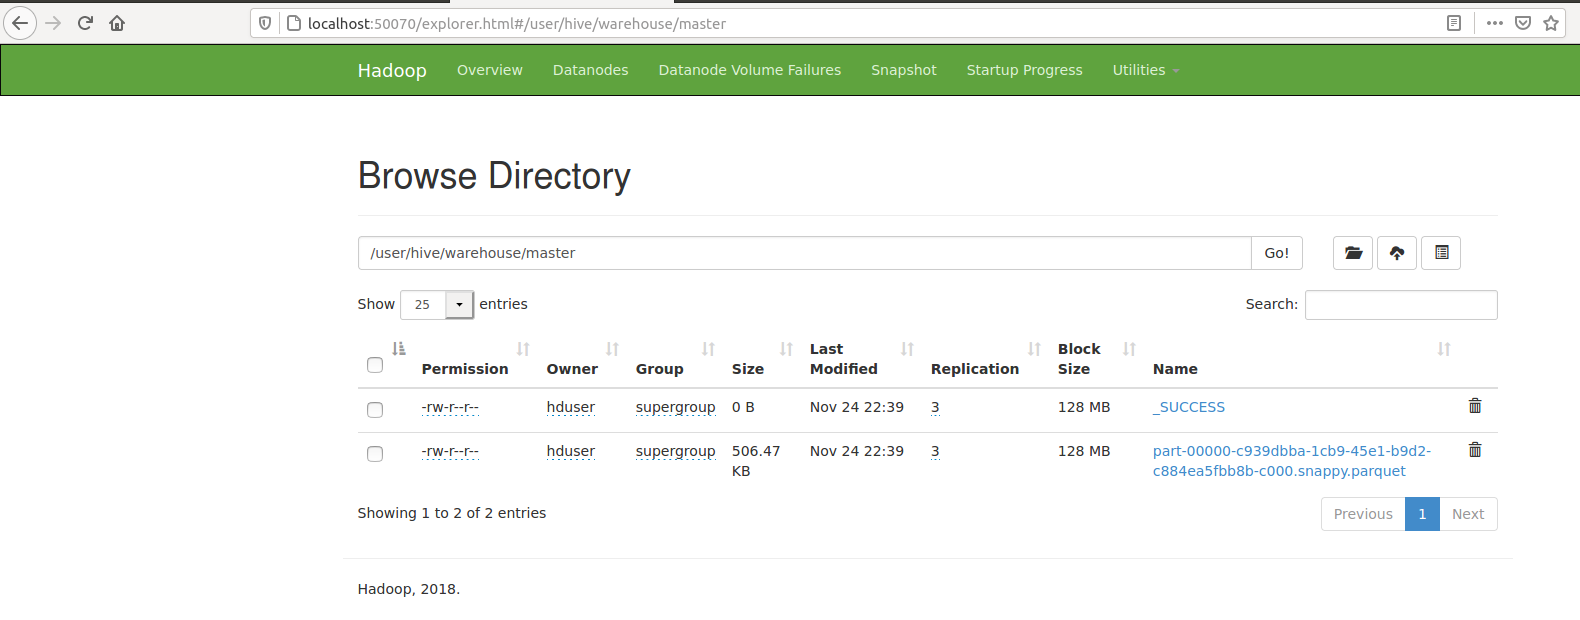

Renaming the columns containing "."

In [33]:
master_loan_df=master_loan_df.withColumnRenamed("Date.of.Birth","DateOfBirth").withColumnRenamed("Employment.Type","EmploymentType").withColumnRenamed("PERFORM_CNS.SCORE","Perform_CNS_score").withColumnRenamed("DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS","Delinquent_accounts").withColumnRenamed("CREDIT.HISTORY.LENGTH","Credit_History_Length").withColumnRenamed("NO.OF_INQUIRIES","No_of_inquiries")

In [34]:
master_loan_df.printSchema()

root
 |-- Loan_id: integer (nullable = true)
 |-- branch_id: integer (nullable = true)
 |-- disbursed_amount: integer (nullable = true)
 |-- asset_cost: integer (nullable = true)
 |-- ltv: double (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- EmploymentType: string (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MobileNo_Avl_Flag: integer (nullable = true)
 |-- Aadhar_flag: integer (nullable = true)
 |-- PAN_flag: integer (nullable = true)
 |-- VoterID_flag: integer (nullable = true)
 |-- Driving_flag: integer (nullable = true)
 |-- Passport_flag: integer (nullable = true)
 |-- Perform_CNS_score: integer (nullable = true)
 |-- Delinquent_accounts: integer (nullable = true)
 |-- Credit_History_Length: string (nullable = true)
 |-- No_of_inquiries: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- loan_default: integer (nullable = true)



#### Perform profiling of the data through PySpark and ensure that it is migrated correctly whereever the source is an RDBMS

In [35]:
master_loan_df.toPandas().describe()

,Loan_id,branch_id,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Perform_CNS_score,Delinquent_accounts,No_of_inquiries,loan_default
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,11658.000000,72.079262,54297.647309,75842.182887,74.701607,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790,0.219858
std,6730.605099,69.095008,13061.877434,18988.525635,11.462722,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901,0.414159
min,1.000000,1.000000,13369.000000,37230.000000,17.130000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5829.500000,13.000000,46949.000000,65629.000000,68.830000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11658.000000,61.000000,53759.000000,70929.000000,76.710000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17486.500000,121.000000,60379.000000,79354.500000,83.630000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000
max,23315.000000,261.000000,592460.000000,715186.000000,94.980000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000


Creates or replaces a local temporary view with this DataFrame.

In [36]:
master_loan_df.createOrReplaceTempView("master")

Profiling the data

In [37]:
master_loan_temp=spark.sql('select * from master')

In [38]:
type(master_loan_temp)

pyspark.sql.dataframe.DataFrame

In [39]:
master_loan_temp.describe

<bound method DataFrame.describe of DataFrame[Loan_id: int, branch_id: int, disbursed_amount: int, asset_cost: int, ltv: double, DateOfBirth: string, EmploymentType: string, DisbursalDate: string, MobileNo_Avl_Flag: int, Aadhar_flag: int, PAN_flag: int, VoterID_flag: int, Driving_flag: int, Passport_flag: int, Perform_CNS_score: int, Delinquent_accounts: int, Credit_History_Length: string, No_of_inquiries: int, region: string, loan_default: int]>

In [40]:
master_loan_temp.show(3)

+-------+---------+----------------+----------+-----+-----------+--------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-------------------+---------------------+---------------+------+------------+
|Loan_id|branch_id|disbursed_amount|asset_cost|  ltv|DateOfBirth|EmploymentType|DisbursalDate|MobileNo_Avl_Flag|Aadhar_flag|PAN_flag|VoterID_flag|Driving_flag|Passport_flag|Perform_CNS_score|Delinquent_accounts|Credit_History_Length|No_of_inquiries|region|loan_default|
+-------+---------+----------------+----------+-----+-----------+--------------+-------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-------------------+---------------------+---------------+------+------------+
|      1|       64|           36439|     65850|56.19| 14-06-1990| Self employed|   28-09-2018|                1|          1|       0|           0|           0|            0|                0

Describing the statistical measures for features using in-built function

In [41]:
master_loan_statistics=master_loan_temp.describe()
master_loan_statistics.show()

+-------+-----------------+-----------------+-----------------+-----------------+------------------+-----------+--------------+-------------+-----------------+------------------+-------------------+-------------------+--------------------+--------------------+-----------------+-------------------+---------------------+-------------------+------+-------------------+
|summary|          Loan_id|        branch_id| disbursed_amount|       asset_cost|               ltv|DateOfBirth|EmploymentType|DisbursalDate|MobileNo_Avl_Flag|       Aadhar_flag|           PAN_flag|       VoterID_flag|        Driving_flag|       Passport_flag|Perform_CNS_score|Delinquent_accounts|Credit_History_Length|    No_of_inquiries|region|       loan_default|
+-------+-----------------+-----------------+-----------------+-----------------+------------------+-----------+--------------+-------------+-----------------+------------------+-------------------+-------------------+--------------------+--------------------+----

Selecting all columns in the dataframe for data profiling

In [42]:
profile_cols=master_loan_temp.columns

In [43]:
profile_cols

['Loan_id',
 'branch_id',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'DateOfBirth',
 'EmploymentType',
 'DisbursalDate',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'Perform_CNS_score',
 'Delinquent_accounts',
 'Credit_History_Length',
 'No_of_inquiries',
 'region',
 'loan_default']

Displaying the data types of profile_cols

In [44]:
master_loan_temp.dtypes

[('Loan_id', 'int'),
 ('branch_id', 'int'),
 ('disbursed_amount', 'int'),
 ('asset_cost', 'int'),
 ('ltv', 'double'),
 ('DateOfBirth', 'string'),
 ('EmploymentType', 'string'),
 ('DisbursalDate', 'string'),
 ('MobileNo_Avl_Flag', 'int'),
 ('Aadhar_flag', 'int'),
 ('PAN_flag', 'int'),
 ('VoterID_flag', 'int'),
 ('Driving_flag', 'int'),
 ('Passport_flag', 'int'),
 ('Perform_CNS_score', 'int'),
 ('Delinquent_accounts', 'int'),
 ('Credit_History_Length', 'string'),
 ('No_of_inquiries', 'int'),
 ('region', 'string'),
 ('loan_default', 'int')]

In [45]:
# data_df = master_loan_temp.select(profile_cols)
# columns2Bprofiled = data_df.columns

In [46]:
# global schema_name, table_name
# if not 'schema_name' in globals():
#     schema_name = 'schema_name'
# if not 'table_name' in globals():
#     table_name = 'table_name' 

In [47]:
# dprof_df = pd.DataFrame({'columna':data_df.columns,'data_types':[x[1] for x in data_df.dtypes]}) 
    

In [48]:
master_loan_profile = pd.DataFrame({'Features':profile_cols,'data_types':[dt[1] for dt in master_loan_temp.dtypes]}) 

In [49]:
master_loan_profile

,Features,data_types
0,Loan_id,int
1,branch_id,int
2,disbursed_amount,int
3,asset_cost,int
4,ltv,double
5,DateOfBirth,string
6,EmploymentType,string
7,DisbursalDate,string
8,MobileNo_Avl_Flag,int
9,Aadhar_flag,int


Find the total number of rows in dataframe

In [50]:
rows = master_loan_temp.count()
rows

23315

Finding the null values or missing values for each feature

In [51]:
count_nan = master_loan_temp.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in profile_cols]).toPandas().transpose()
count_nan = count_nan.reset_index()  
count_nan.columns = ['Features','Missing_values']
master_loan_profile = pd.merge(master_loan_profile,count_nan, on = ['Features'], how = 'left')

In [52]:
master_loan_profile 

,Features,data_types,Missing_values
0,Loan_id,int,0
1,branch_id,int,0
2,disbursed_amount,int,0
3,asset_cost,int,0
4,ltv,double,0
5,DateOfBirth,string,0
6,EmploymentType,string,770
7,DisbursalDate,string,0
8,MobileNo_Avl_Flag,int,0
9,Aadhar_flag,int,0


In [53]:
# num_spaces = [data_df.where(F.col(c).rlike('^\\s+$')).count() for c in data_df.columns]
# dprof_df['num_spaces'] = num_spaces
# num_blank = [data_df.where(F.col(c)=='').count() for c in data_df.columns]
# dprof_df['num_blank'] = num_blank

In [54]:
master_loan_statistics.toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Loan_id,23315,11658.0,6730.605099097703,1,23315
branch_id,23315,72.07926227750376,69.09500824842503,1,261
disbursed_amount,23315,54297.64730859961,13061.87743441026,13369,592460
asset_cost,23315,75842.18288655372,18988.52563450024,37230,715186
ltv,23315,74.70160669097099,11.462722365672377,17.13,94.98
DateOfBirth,23315,None,None,01-01-1955,31-12-1997
EmploymentType,22545,None,None,Salaried,Self employed
DisbursalDate,23315,None,None,01-08-2018,31-10-2018
MobileNo_Avl_Flag,23315,1.0,0.0,1,1


In [55]:
master_loan_statistics_desc=master_loan_statistics.toPandas().transpose()
master_loan_statistics_desc.columns = ['count', 'mean', 'stddev', 'min', 'max']
master_loan_statistics_desc= master_loan_statistics_desc.iloc[1:,:]  
master_loan_statistics_desc= master_loan_statistics_desc.reset_index()  
master_loan_statistics_desc.columns.values[0] = 'Features' 
master_loan_statistics_desc = master_loan_statistics_desc[['Features','count', 'mean', 'stddev']] 
master_loan_profile= pd.merge(master_loan_profile, master_loan_statistics_desc , on = ['Features'], how = 'left')

In [56]:
allminvalues = [master_loan_temp.select(F.min(x)).limit(1).toPandas().iloc[0][0] for x in profile_cols]
allmaxvalues = [master_loan_temp.select(F.max(x)).limit(1).toPandas().iloc[0][0] for x in profile_cols]
df_counts =master_loan_profile[['Features']]
df_counts.insert(loc=0, column='min', value=allminvalues)
df_counts.insert(loc=0, column='max', value=allmaxvalues)
df_counts = df_counts[['Features','min','max']]
master_loan_profile = pd.merge(master_loan_profile, df_counts , on = ['Features'], how = 'left')  

In [57]:
master_loan_profile

,Features,data_types,Missing_values,count,mean,stddev,min,max
0,Loan_id,int,0,23315,11658.0,6730.605099097703,1,23315
1,branch_id,int,0,23315,72.07926227750376,69.09500824842503,1,261
2,disbursed_amount,int,0,23315,54297.64730859961,13061.87743441026,13369,592460
3,asset_cost,int,0,23315,75842.18288655372,18988.52563450024,37230,715186
4,ltv,double,0,23315,74.70160669097099,11.462722365672377,17.13,94.98
5,DateOfBirth,string,0,23315,None,None,01-01-1955,31-12-1997
6,EmploymentType,string,770,22545,None,None,Salaried,Self employed
7,DisbursalDate,string,0,23315,None,None,01-08-2018,31-10-2018
8,MobileNo_Avl_Flag,int,0,23315,1.0,0.0,1,1
9,Aadhar_flag,int,0,23315,0.8450782757881192,0.3618378077692845,0,1


Finding the number of distinct values for each feature

In [58]:
master_loan_profile['num_distinct'] = [master_loan_temp.select(x).distinct().count() for x in profile_cols]
    # ============================================
    # most frequently occuring value in a column and its count
# master_loan_profile['most_freq_valwcount'] = [master_loan_temp.groupBy(x).count().sort("count",ascending=False).limit(1).toPandas().iloc[0].values.tolist() for x in profile_cols]
# master_loan_profile['most_freq_value'] = [x[0] for x in master_loan_profile['most_freq_valwcount']]
# master_loan_profile['most_freq_value_count'] = [x[1] for x in master_loan_profile['most_freq_valwcount']]
# master_loan_profile = master_loan_profile.drop(['most_freq_valwcount'],axis=1)
#     # least frequently occuring value in a column and its count
# master_loan_profile['least_freq_valwcount'] = [master_loan_temp.groupBy(x).count().sort("count",ascending=True).limit(1).toPandas().iloc[0].values.tolist() for x in profile_cols]
# master_loan_profile['least_freq_value'] = [x[0] for x in master_loan_profile['least_freq_valwcount']]
# master_loan_profile['least_freq_value_count'] = [x[1] for x in master_loan_profile['least_freq_valwcount']]
# master_loan_profile = master_loan_profile.drop(['least_freq_valwcount'],axis=1)


In [59]:
master_loan_profile

,Features,data_types,Missing_values,count,mean,stddev,min,max,num_distinct
0,Loan_id,int,0,23315,11658.0,6730.605099097703,1,23315,23315
1,branch_id,int,0,23315,72.07926227750376,69.09500824842503,1,261,82
2,disbursed_amount,int,0,23315,54297.64730859961,13061.87743441026,13369,592460,6057
3,asset_cost,int,0,23315,75842.18288655372,18988.52563450024,37230,715186,13886
4,ltv,double,0,23315,74.70160669097099,11.462722365672377,17.13,94.98,4527
5,DateOfBirth,string,0,23315,None,None,01-01-1955,31-12-1997,8729
6,EmploymentType,string,770,22545,None,None,Salaried,Self employed,3
7,DisbursalDate,string,0,23315,None,None,01-08-2018,31-10-2018,84
8,MobileNo_Avl_Flag,int,0,23315,1.0,0.0,1,1,1
9,Aadhar_flag,int,0,23315,0.8450782757881192,0.3618378077692845,0,1,2


In [60]:
type(master_loan_profile)

pandas.core.frame.DataFrame

In [61]:
# quantile=master_loan_profile.groupby('Features').agg(F.expr('percentile(Features, array(0.25))')[0].alias('%25'),F.expr('percentile(Features, array(0.50))')[0].alias('%50'),F.expr('percentile(Features, array(0.75))')[0].alias('%75'))

In [62]:
# quantile

In [63]:
# from pyspark.sql import DataFrameStatFunctions as statFunc

In [64]:
# from pyspark.sql import SQLContext 
# sqlContext = SQLContext(spark)

In [65]:
# df2 = sqlContext.sql("select Loan_id, percentile_approx(disbursed_amount,0.25) as approxQuantile from master_loan_df group by Loan_id")


In [67]:
# statFunc(master_loan_profile).approxQuantile("Features",[0.5],0.25)

Finding the missing values for data cleaning

In [68]:
!pip install missingno

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


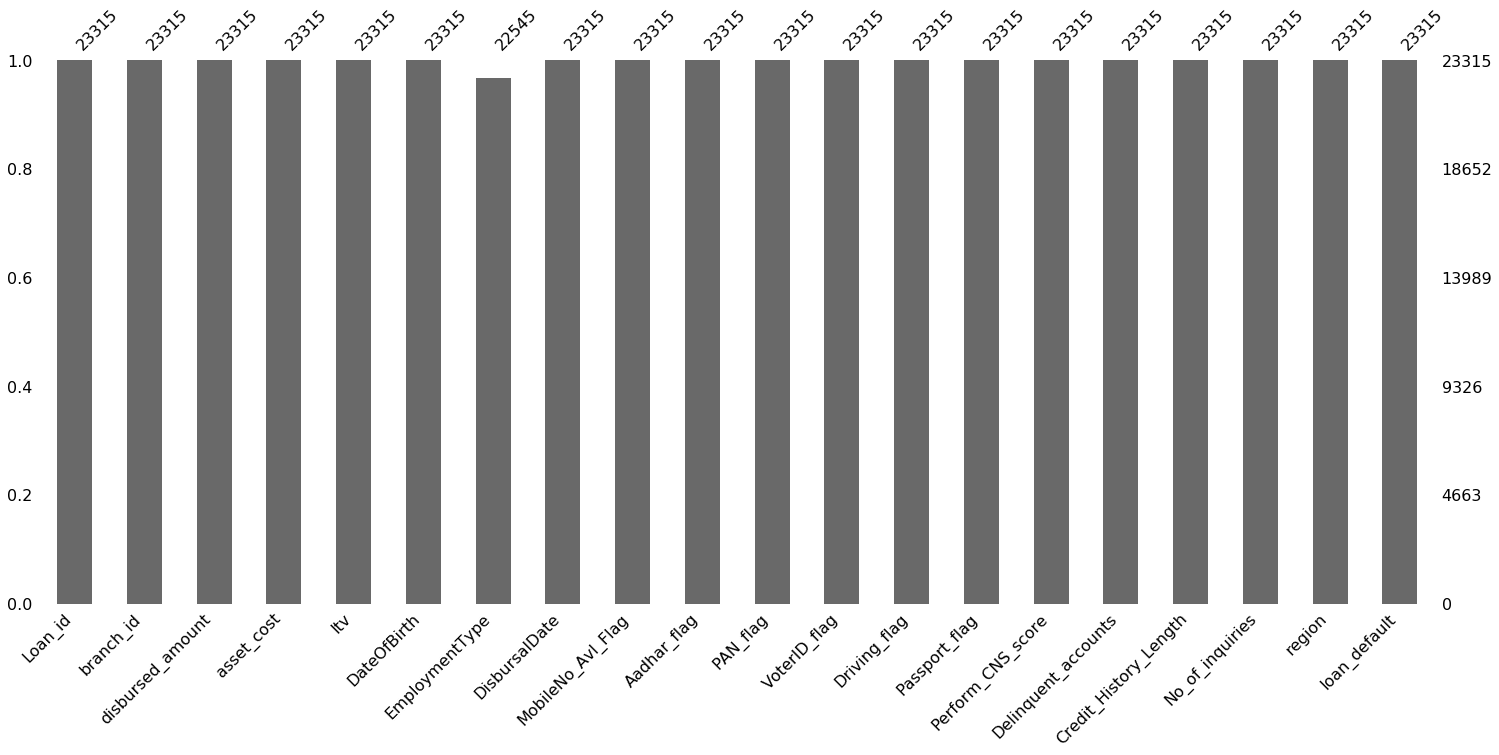

In [72]:
import missingno as msno
msno.bar(master_loan_df.toPandas())

The above bar plot shows that there are 23315-22545=770 missing values for EmploymentType in the given dataset.

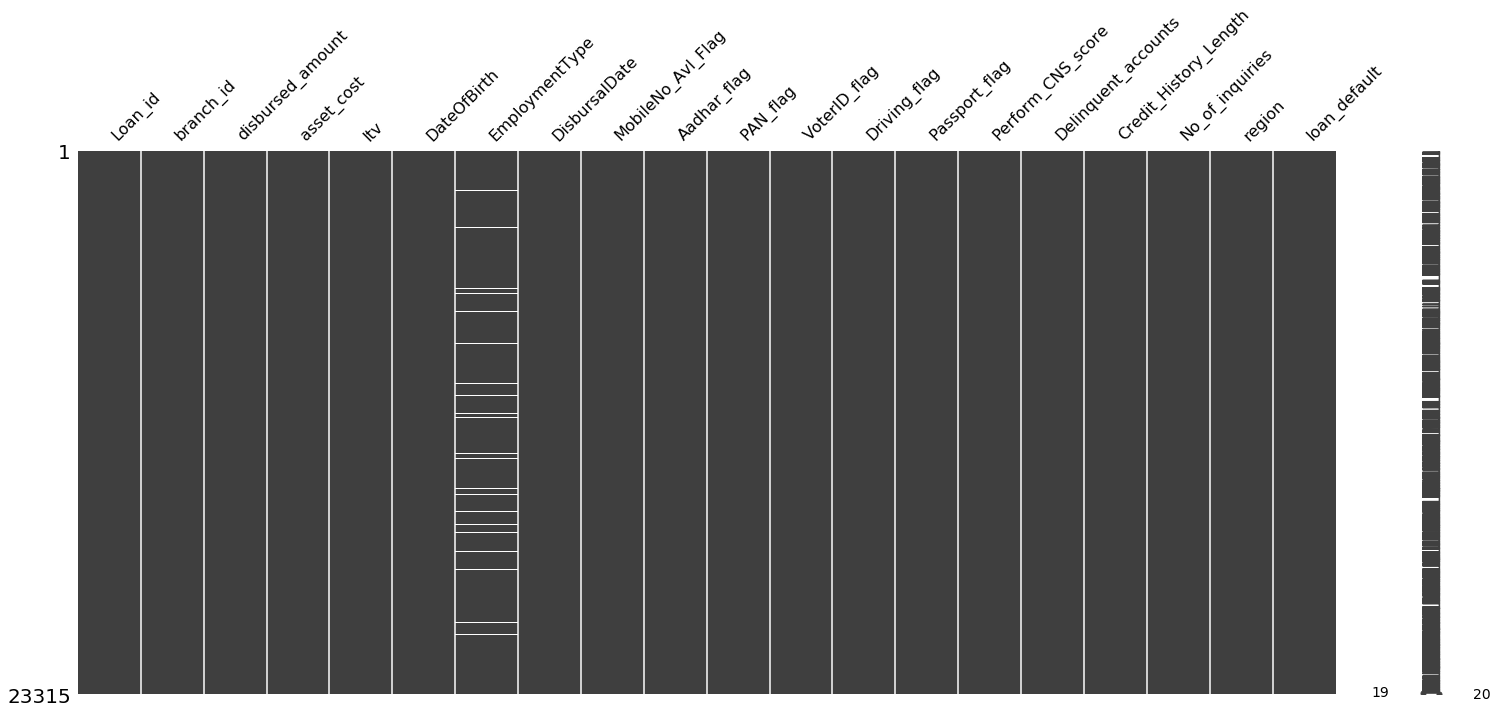

In [70]:
msno.matrix(master_loan_df.toPandas())

The above matrix shows the Loan_id's which have the missing values for EmploymentType.

In [80]:
unique_emptype=spark.sql("select EmploymentType, count(*) as Count from master group by EmploymentType")
unique_emptype.show()

+--------------+-----+
|EmploymentType|Count|
+--------------+-----+
|          null|  770|
| Self employed|12724|
|      Salaried| 9821|
+--------------+-----+



Missing value treatment

In [106]:
master_loan_df=master_loan_df.na.fill({'EmploymentType':'Unemployed'})
master_loan_df

DataFrame[Loan_id: int, branch_id: int, disbursed_amount: int, asset_cost: int, ltv: double, DateOfBirth: string, EmploymentType: string, DisbursalDate: string, MobileNo_Avl_Flag: int, Aadhar_flag: int, PAN_flag: int, VoterID_flag: int, Driving_flag: int, Passport_flag: int, Perform_CNS_score: int, Delinquent_accounts: int, Credit_History_Length: string, No_of_inquiries: int, region: string, loan_default: int]

In [111]:
master_loan_df.select('EmploymentType').distinct().show()

+--------------+
|EmploymentType|
+--------------+
| Self employed|
|      Salaried|
|    Unemployed|
+--------------+



The missing values in EmploymentType have been replaced with Unemployed.

One-hot encoding for categorical variables

In [113]:
# from pyspark.ml.feature import StringIndexer

# df = sqlContext.createDataFrame(
#     [(0, "Self employed"), (1, "Salaried"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
#     ["id", "category"])
# indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
# indexed = indexer.fit(df).transform(df)
# indexed.show()

Storing the dataframe in parquet

In [ ]:
loan_df.write.parquet("Loan_details_saved.parquet")

In [ ]:
status_df.write.parquet("status_details_saved.parquet")

In [ ]:
Branch_df.write.parquet("branch_details_saved.parquet")